In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re 

In [53]:
df = pd.read_excel("Data Model - Pizza Sales.xlsx")
df.head(2)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


# 2. informations de base:

#### a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?

In [11]:
question2a = df['pizza_id'].nunique()
print(question2a)

91


#### b. Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?

In [13]:
question2b = df['order_id'].nunique()
print(question2b)

21350


# 3. Analyse temporelle:

#### a. Quelle est la plage de dates dans le jeu de données ?

In [12]:
question3amin = df['order_date'].min()
question3amax = df['order_date'].max()
print(f'début : {question3amin}', f'fin : {question3amax}')

début : 2015-01-01 00:00:00 fin : 2015-12-31 00:00:00


#### b. Combien de commandes ont été passées chaque jour ?

In [88]:
#question3b = df['order_date'].value_counts()
question3b = df.groupby('order_date')['order_id'].count() 
question3b.head()

order_date
2015-01-01    161
2015-01-02    160
2015-01-03    154
2015-01-04    106
2015-01-05    121
Name: order_id, dtype: int64

#### c. Quelle est la durée moyenne pour traiter une commande ?

In [17]:
df2 = df.drop_duplicates(subset='order_id').copy()
df2['order_time'] = pd.to_datetime(df2['order_time'], format='%H:%M:%S').dt.time
df2['diff'] = df2.groupby('order_date')['order_time'].transform(lambda x: pd.to_datetime(x, format='%H:%M:%S').diff().dt.total_seconds().fillna(0))
question3c = df2['diff'].mean() / 60
print(f'{question3c.round(1)} min')

10.8 min


# 4. Analyse quantitative:

#### a. Quelle est la quantité moyenne de pizzas commandées ?

In [19]:
question4a = df.groupby('order_id')['quantity'].sum().mean()
print(f'{int(question4a.round())} pizzas')

2 pizzas


#### b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [44]:
question4b = df['pizza_size'].value_counts()
question4b.head()

pizza_size
3    18526
2    15385
1    14137
4      544
5       28
Name: count, dtype: int64

#### c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [22]:
question4c = df['pizza_category'].value_counts()
question4c.head()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

# 5. Analyse des prix:

#### a. Quel est le prix unitaire moyen des pizzas ?

In [23]:
df_no_duplicates = df.drop_duplicates(subset=['pizza_id'])
question5a = df_no_duplicates['unit_price'].mean()
print(f'{question5a.round(2)} euros')

16.51 euros


#### b. Quel est le prix total moyen d'une commande ?

In [24]:
question5b = df.groupby('order_id')['total_price'].sum().mean()
print(f'{question5b.round(2)} euros')

38.31 euros


#### c. Quelle pizza a le prix unitaire le plus élevé ?

In [28]:
question5c = df.groupby('pizza_id')['unit_price'].mean()
question5c.head()

pizza_id
bbq_ckn_l       20.75
bbq_ckn_m       16.75
bbq_ckn_s       12.75
big_meat_s      12.00
brie_carre_s    23.65
Name: unit_price, dtype: float64

# 6. Répartition par taille et catégorie:

#### a. Combien de pizzas de chaque taille ont été vendues ?

In [44]:
question6a = df['pizza_size'].value_counts()
question6a.head()

pizza_size
3    18526
2    15385
1    14137
4      544
5       28
Name: count, dtype: int64

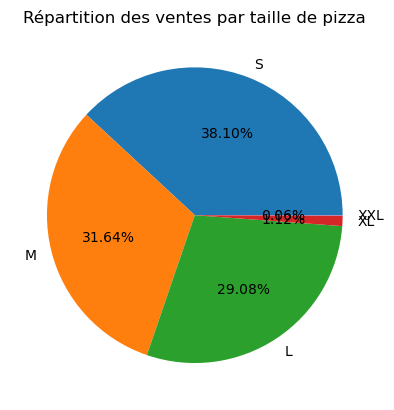

In [27]:
question6a = df['pizza_size'].value_counts()
plt.pie(x=question6a, labels=['S','M','L','XL','XXL'], autopct='%.2f%%')
plt.title('Répartition des ventes par taille de pizza')
plt.show()

#### b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [45]:
question6b = df.groupby('pizza_category')['pizza_name'].nunique()
question6b.head()

pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64

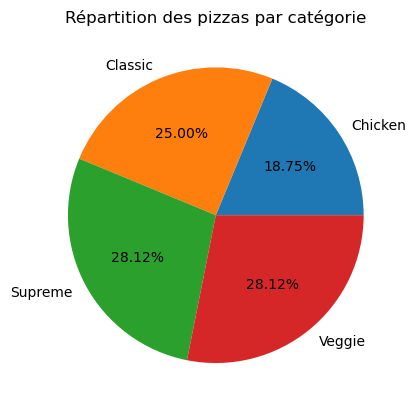

In [28]:
question6b = df.groupby('pizza_category')['pizza_name'].nunique()
plt.pie(x=question6b, labels=question6b.index, autopct='%.2f%%')
plt.title('Répartition des pizzas par catégorie')
plt.show()

# 7. Analyse des ingrédients

#### a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [68]:
df2 = df.copy()
df2 = df2.drop_duplicates(subset=['pizza_name'])
df2['pizza_ingredients'] = df2['pizza_ingredients'].str.split(', ')
df_exploded = df2.explode('pizza_ingredients')

question7a = df_exploded['pizza_ingredients'].value_counts().reset_index()
question7a.columns = ['ingredient', 'count']

print(question7a.head())

    ingredient  count
0       Garlic     20
1     Tomatoes     18
2   Red Onions     13
3  Red Peppers     10
4      Spinach      8


#### b. Combien de pizzas contiennent un ingrédient spécifique (par exemple, pepperoni, champignons) ?

regarder le tableau ci-dessus.

# 8. Détails de la commande:

#### a. Quelle est la répartition du nombre de pizzas par commande ?

In [78]:
question8a = df.groupby('order_id')['quantity'].sum()
compteur = question8a.groupby(question8a).count()
compteur.head()


quantity
1    8111
2    6152
3    3207
4    3122
5     145
Name: quantity, dtype: int64

#### b. Quelle est la répartition des prix totaux pour les commandes ?

In [34]:
question8b = df.groupby('order_id')['total_price'].sum()
compteur2 = question8b.groupby(question8b).count()
compteur2.head()

total_price
9.75     105
10.50    177
11.00    112
12.00    923
12.25    150
Name: total_price, dtype: int64

# 9. Analyse du chiffre d'affaires en fonction du temps:

#### a. Quel est le chiffre d'affaires quotidien ?

In [35]:
question9a = df.groupby('order_date')['total_price'].sum()
question9a.head()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
Name: total_price, dtype: float64

#### b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?

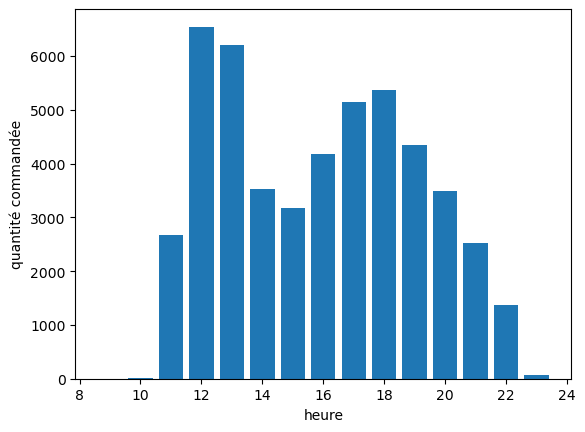

In [81]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['heure_col'] = df['order_time'].dt.hour
question9b = df.groupby('heure_col')['order_id'].count()

plt.bar(height=question9b, x=question9b.index)
plt.xlabel('heure')
plt.ylabel('quantité commandée')
plt.show()

In [87]:
indices_serie = pd.Series(question9b.index)
correlation = question9b.corr(indices_serie)
print(correlation)

0.7477195185811683


La méthode .corr nous indique qu'il y a corrélation. Cependant, ce n'est pas la bonne méthode, car l'histogramme nous montre le contraire. En effet, les commandes n'augmentent pas de manière strictement croissante ou ne diminuent pas strictement au fil de la journée.

# 10. Pizzas populaires:

#### a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [39]:
question10a = df.groupby('pizza_name')['quantity'].sum()
top_5a = question10a.nlargest(5)
top_5a.head()

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

#### b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?

In [71]:
question10b = df.groupby('pizza_name')['total_price'].sum()
top_5b = question10b.nlargest(5)
top_5b.head()

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64

# 11. Chiffre d'affaires par taille et catégorie:

#### a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [70]:
question11a = df.groupby('pizza_size')['total_price'].sum()
question11a.head()

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

#### b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?

In [72]:
question11b = df.groupby('pizza_category')['total_price'].sum()
question11b.head()

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

# 12. Corrélation entre prix et quantité:

#### a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

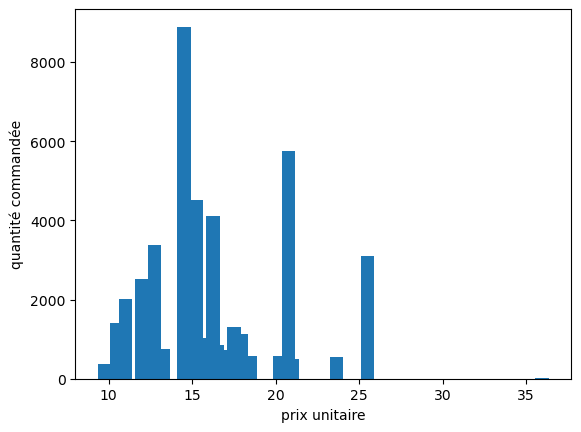

In [72]:
plt.bar(height=df.groupby('unit_price')['quantity'].sum(), x=df['unit_price'].unique())
plt.xlabel('prix unitaire')
plt.ylabel('quantité commandée')
plt.show()


In [70]:
question12a = df['unit_price'].corr(df['quantity'])
print(question12a)

0.0071424639246699005


Coeff de corrélation proche de 0, il n'y donc pas de corrélation entre le prix unitaire et la quantité commandée. De plus le graphe prouve bien ce que la méthode nous dit.

#### b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

In [9]:
question12b = df.groupby('pizza_size')['unit_price'].mean()
question12b.head()

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

# 13. Tendances saisonnières:

#### a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

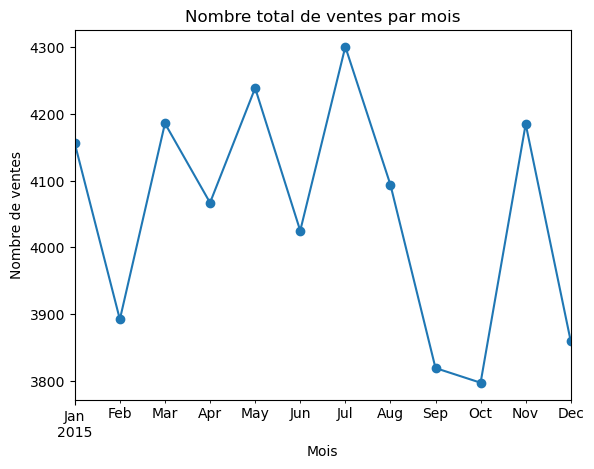

In [4]:
df.resample('M', on='order_date').size().plot(marker='o', linestyle='-')
plt.title('Nombre total de ventes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.show()

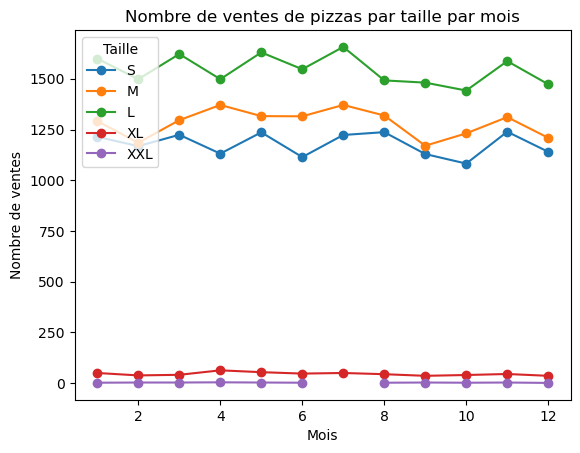

In [63]:
df2 = df.copy()
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}
df2['pizza_size'] = df2['pizza_size'].map(size_mapping)

grouped_data = df2.groupby([df2['order_date'].dt.month, 'pizza_size'])['pizza_size'].count().unstack()

grouped_data.plot(marker='o', linestyle='-')
plt.title('Nombre de ventes de pizzas par taille par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.legend(title='Taille', loc='upper left', labels=['S', 'M', 'L', 'XL', 'XXL'])
plt.show()

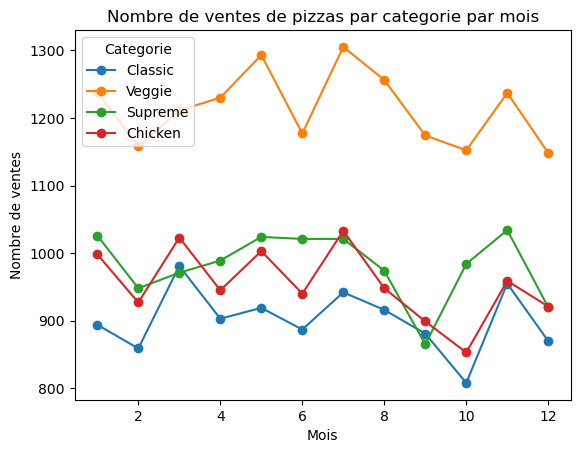

In [65]:
grouped_data = df.groupby([df['order_date'].dt.month, 'pizza_category'])['pizza_category'].count().unstack()

grouped_data.plot(marker='o', linestyle='-')
plt.title('Nombre de ventes de pizzas par categorie par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.legend(title='Categorie', loc='upper left', labels=['Classic', 'Veggie', 'Supreme', 'Chicken'])
plt.show()

#### b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?

In [74]:
df['jour_semaine'] = df['order_date'].dt.dayofweek
question13b = df.groupby('jour_semaine')['order_id'].nunique()
question13b = pd.Series(question13b, name='qté de cmd')
T = pd.Series([t for t in range(7)], name='j_semaine')
dataframe = pd.DataFrame({T.name: T, question13b.name: question13b})
dataframe['j_semaine'].corr(dataframe['qté de cmd'])

0.09625856716473447

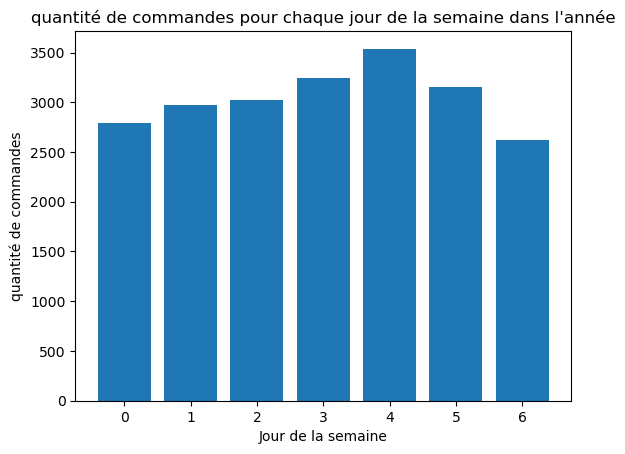

In [77]:
plt.bar(height=question13b, x=T)
plt.xlabel('Jour de la semaine')
plt.ylabel('quantité de commandes')
plt.title("quantité de commandes pour chaque jour de la semaine dans l'année")
plt.show()



Il n'y a donc pas de corrélation.